<a href="https://colab.research.google.com/github/apsamanpreet/Handwritting_Recognition_Machine_learning/blob/main/Project_1_Pen_Based_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 1 by- Raman Preet Singh**

Master of Science in Mathematics

(rpsamanpreet@gmail.com)

This project explores machine learning approaches for classifying handwritten digits from pen trajectory data (UCI Pen-Based Digits dataset). Using 10,992 samples of 16 pen-movement features, we compare preprocessing techniques, classification algorithms, and dimensionality reduction methods to build an optimal digit recognition system. The workflow progresses from exploratory analysis to advanced model optimization, culminating in feature selection insights.
1. Preprocessing → 2. Basic Models → 3. Advanced Models → 4. Optimization → 5. Deployment-Ready Pipeline

I used the Pen-Based Handwritten Digits dataset, which records the dynamic motion of writing digits (0-9) rather than static images. Unlike MNIST, this dataset captures temporal patterns, making it interesting for testing feature-based ML models like KNN and Decision Trees. Each sample includes 16 features (8 x/y points), normalized for consistency.

I begin with loading and cleaning the dataset, handling missing values (none found), and scaling features. Visualizations reveal the distribution of pen movements and correlations between coordinates. An 80-20 stratified train-test split ensures balanced representation of all digits (0-9).



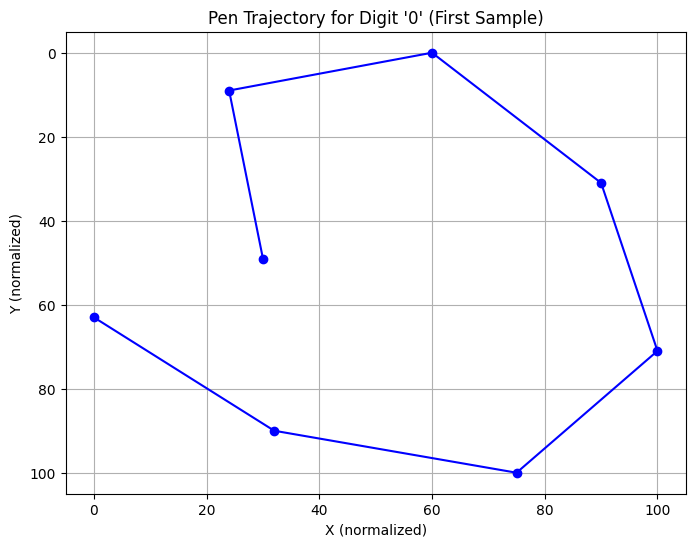

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (adjust path if needed)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra"
df = pd.read_csv(url, header=None)

# Split features (X) and labels (y)
X = df.iloc[:, :-1].values  # First 16 columns are features
y = df.iloc[:, -1].values   # Last column is the label (0-9)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the trajectory of the first '0' in the training set
zero_indices = (y_train == 0)  # Get all samples labeled '0'
first_zero = X_train[zero_indices][0]  # Take the first sample

plt.figure(figsize=(8, 6))
plt.plot(first_zero[::2], first_zero[1::2], 'bo-')  # x=even indices, y=odd indices
plt.title("Pen Trajectory for Digit '0' (First Sample)")
plt.xlabel("X (normalized)")
plt.ylabel("Y (normalized)")
plt.gca().invert_yaxis()  # Tablet coordinates start at top-left
plt.grid()
plt.show()

In [ ]:
# Normalize coordinates to [0,1] range (simulates resolution reduction)
coord_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_normalized = coord_scaler.fit_transform(X_train)
X_test_normalized = coord_scaler.transform(X_test)

print("Original range:", X_train.min(), X_train.max())
print("Normalized range:", X_train_normalized.min(), X_train_normalized.max())

Original range: 0 100
Normalized range: 0.0 1.0


In [ ]:
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import requests
from zipfile import ZipFile
from io import BytesIO

In [ ]:
# Define the download URL and the local zip file path
download_url = 'https://archive.ics.uci.edu/static/public/81/pen+based+recognition+of+handwritten+digits.zip'
zip_path = 'pendigits.zip'
data_dir = 'pendigits_data'

# Download the zip file
print(f"Downloading '{download_url}' to '{zip_path}'...")
try:
    response = requests.get(download_url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes
    with open(zip_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print("Download complete.")
except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")
    exit()

Download complete.


In [ ]:
# Create the data directory if it doesn't exist
os.makedirs(data_dir, exist_ok=True)

# Extract all files
print(f"Extracting files from '{zip_path}' to '{data_dir}'...")
try:
    with ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_dir)
    print("Extraction complete.")
except Exception as e:
    print(f"Error during extraction: {e}")
    exit()

# List extracted files to double-check
extracted_files = os.listdir(data_dir)
print("Extracted files in {}: {}".format(data_dir, extracted_files))

# Define paths to the data files
pendigits_train_path = os.path.join(data_dir, 'pendigits.tra')
pendigits_test_path = os.path.join(data_dir, 'pendigits.tes')

# Load the training data
try:
    train_df = pd.read_csv(pendigits_train_path, header=None)
    print("Training data shape:", train_df.shape)
    print("First 5 rows of training data:")
    print(train_df.head())
except FileNotFoundError as e:
    print(f"Error loading training data: {e}")
except Exception as e:
    print(f"An unexpected error occurred while loading training data: {e}")

# Load the testing data
try:
    test_df = pd.read_csv(pendigits_test_path, header=None)
    print("\nTesting data shape:", test_df.shape)
    print("First 5 rows of testing data:")
    print(test_df.head())
except FileNotFoundError as e:
    print(f"Error loading testing data: {e}")
except Exception as e:
    print(f"An unexpected error occurred while loading testing data: {e}")

Extracting files from 'pendigits.zip' to 'pendigits_data'...
Extraction complete.
Extracted files in pendigits_data: ['pendigits.names', 'pendigits.tra', 'pendigits-orig.tra.Z', 'pendigits-orig.tes.Z', 'pendigits-orig.names', 'pendigits.tes']
Training data shape: (7494, 17)
First 5 rows of training data:
   0    1   2    3    4    5    6    7   8   9    10  11   12  13   14  15  16
0  47  100  27   81   57   37   26    0   0  23   56  53  100  90   40  98   8
1   0   89  27  100   42   75   29   45  15  15   37   0   69   2  100   6   2
2   0   57  31   68   72   90  100  100  76  75   50  51   28  25   16   0   1
3   0  100   7   92    5   68   19   45  86  34  100  45   74  23   67   0   4
4   0   67  49   83  100  100   81   80  60  60   40  40   33  20   47   0   1

Testing data shape: (3498, 17)
First 5 rows of testing data:
   0    1   2    3   4   5    6   7    8   9    10  11   12   13   14   15  16
0  88   92   2   99  16  66   94  37   70   0    0  24   42   65  100  100   8


In [ ]:
# Assuming you have already loaded train_df and test_df as in the previous response

print("--- Initial Data Exploration ---")

# Check for missing values
print("\nMissing values in training data:")
print(train_df.isnull().sum())
print("\nMissing values in testing data:")
print(test_df.isnull().sum())

# Examine label distribution
print("\nLabel distribution in training data:")
print(train_df.iloc[:, -1].value_counts().sort_index())
print("\nLabel distribution in testing data:")
print(test_df.iloc[:, -1].value_counts().sort_index())

print("\n--- Data Cleaning and Preparation ---")

--- Initial Data Exploration ---

Missing values in training data:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

Missing values in testing data:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

Label distribution in training data:
16
0    780
1    779
2    780
3    719
4    780
5    720
6    720
7    778
8    719
9    719
Name: count, dtype: int64

Label distribution in testing data:
16
0    363
1    364
2    364
3    336
4    364
5    335
6    336
7    364
8    336
9    336
Name: count, dtype: int64

--- Data Cleaning and Preparation ---


In [ ]:
# Remove empty columns (check if any are all NaN)
print("\nShape of training data before removing NaN columns:", train_df.shape)
train_df_cleaned = train_df.dropna(axis=1, how='all')
print("Shape of training data after removing NaN columns:", train_df_cleaned.shape)

print("\nShape of testing data before removing NaN columns:", test_df.shape)
test_df_cleaned = test_df.dropna(axis=1, how='all')
print("Shape of testing data after removing NaN columns:", test_df_cleaned.shape)

# No need to convert labels to binary as they are already 0-9

# Verify the new shapes
print("\nNew shape of cleaned training data:", train_df_cleaned.shape)
print("New shape of cleaned testing data:", test_df_cleaned.shape)

print("\n--- Basic Data Visualization ---")



Shape of training data before removing NaN columns: (7494, 17)
Shape of training data after removing NaN columns: (7494, 17)

Shape of testing data before removing NaN columns: (3498, 17)
Shape of testing data after removing NaN columns: (3498, 17)

New shape of cleaned training data: (7494, 17)
New shape of cleaned testing data: (3498, 17)

--- Basic Data Visualization ---


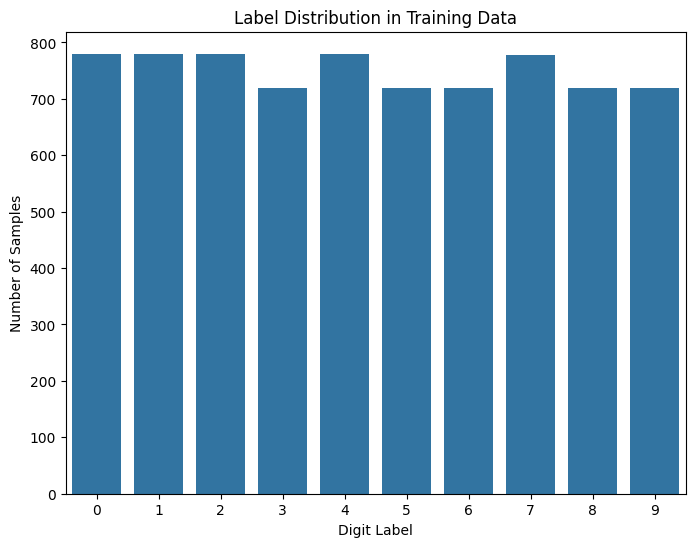

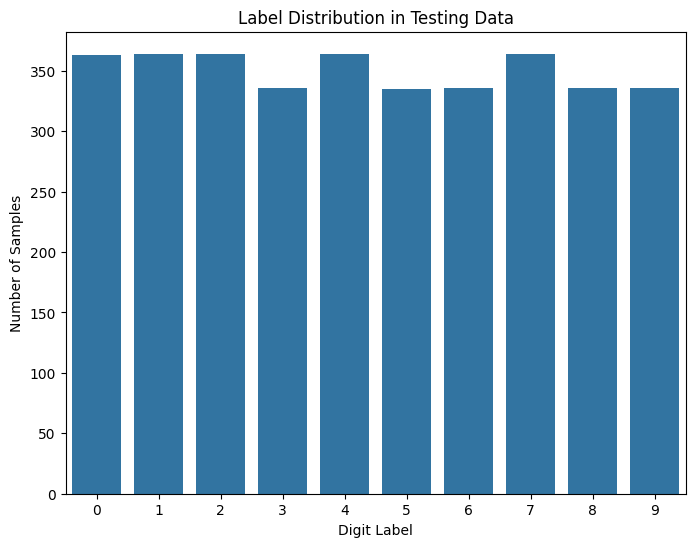

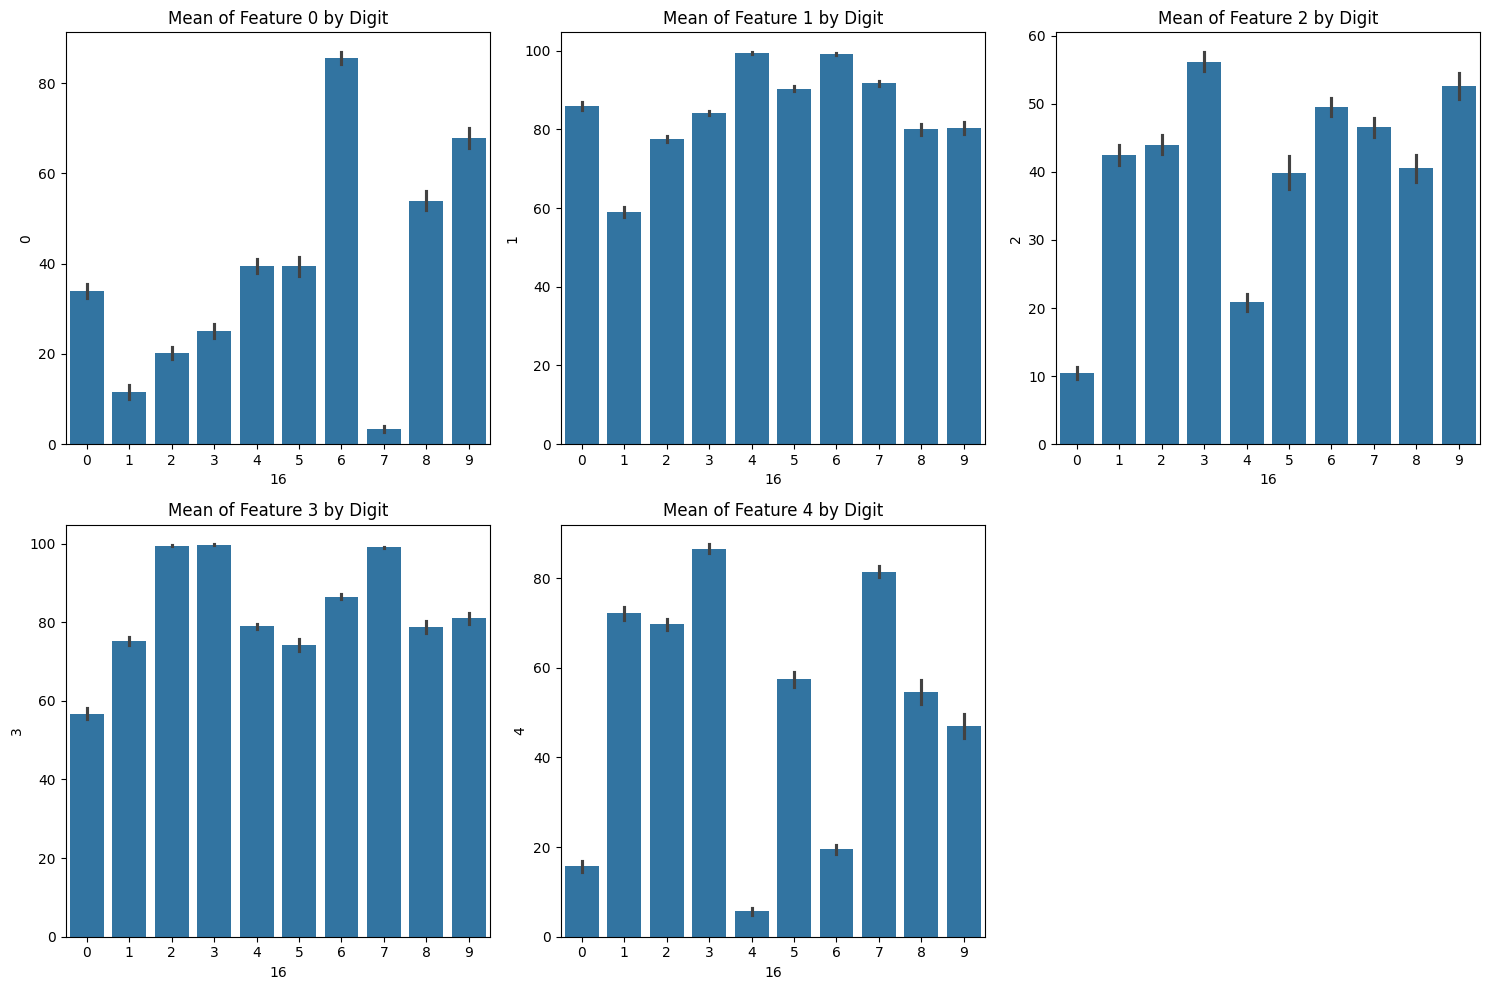


--- Feature Analysis ---


In [ ]:
# Plot label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=train_df_cleaned.iloc[:, -1])
plt.title('Label Distribution in Training Data')
plt.xlabel('Digit Label')
plt.ylabel('Number of Samples')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=test_df_cleaned.iloc[:, -1])
plt.title('Label Distribution in Testing Data')
plt.xlabel('Digit Label')
plt.ylabel('Number of Samples')
plt.show()

# Plot feature means by class (let's look at the first few features)
num_features_to_plot = 5
plt.figure(figsize=(15, 10))
for i in range(num_features_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x=train_df_cleaned.iloc[:, -1], y=train_df_cleaned.iloc[:, i])
    plt.title(f'Mean of Feature {i} by Digit')
plt.tight_layout()
plt.show()

print("\n--- Feature Analysis ---")


Basic statistics of training data features:
                0            1            2            3            4   \
count  7494.000000  7494.000000  7494.000000  7494.000000  7494.000000   
mean     37.384307    84.679343    40.005604    82.889512    50.878303   
std      33.322024    16.848420    26.256025    19.638582    34.927201   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000    76.000000    20.000000    70.000000    17.000000   
50%      31.000000    89.000000    39.000000    89.000000    56.000000   
75%      61.000000   100.000000    58.000000   100.000000    81.000000   
max     100.000000   100.000000   100.000000   100.000000   100.000000   

                5            6            7            8            9   \
count  7494.000000  7494.000000  7494.000000  7494.000000  7494.000000   
mean     65.044436    51.471844    44.599680    57.129971    34.069122   
std      27.377341    30.680075    30.659478    33.680340    27.45

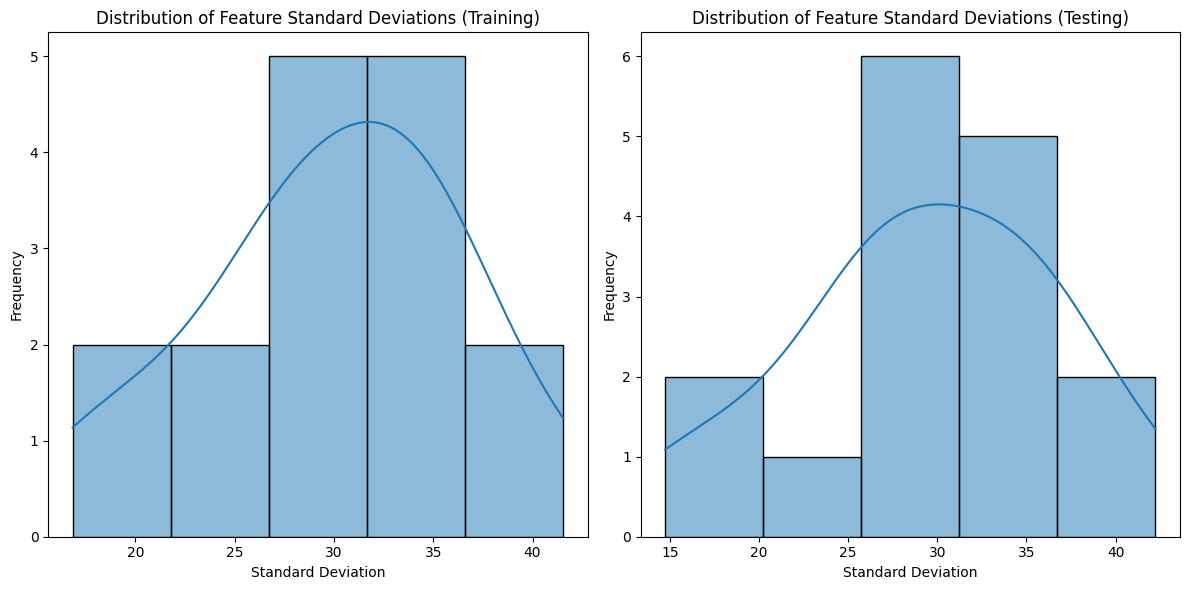

In [ ]:
# Calculate basic statistics
print("\nBasic statistics of training data features:")
print(train_df_cleaned.iloc[:, :-1].describe())

print("\nBasic statistics of testing data features:")
print(test_df_cleaned.iloc[:, :-1].describe())

# Plot distribution of feature standard deviations
train_feature_stds = train_df_cleaned.iloc[:, :-1].std()
test_feature_stds = test_df_cleaned.iloc[:, :-1].std()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_feature_stds, kde=True)
plt.title('Distribution of Feature Standard Deviations (Training)')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(test_feature_stds, kde=True)
plt.title('Distribution of Feature Standard Deviations (Testing)')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()